# MoneyPuck - Hockey data

## Step 0: Import libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from utils import plot_utils, df_utils, thinkstats

In [3]:
outputs_dir = 'outputs'

## Step 1: Import the dataset

In [4]:
skaters_df = "https://moneypuck.com/moneypuck/playerData/seasonSummary/2024/regular/skaters.csv"
df = pd.read_csv(skaters_df)
df.head(5)

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Step 2: Read the data

In [5]:
df_utils.print_df_size(df)

Number of samples: 4600
Number of features: 154


In [6]:
df_utils.save_column_names(df)

Saved: names_columns.txt


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 5.4+ MB


#### Questions

In [21]:
answer = df[df["situation"] == "all"].loc[lambda d: d['I_F_goals'].idxmax()]
print("Top goal scorer: " + str(answer["name"]) + " with " + str(int(answer["I_F_goals"])) + " goals.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d['I_F_goals'].idxmax()]
print("Top goal scorer in 5-on-4 situations: " + str(answer["name"]) + " with " + str(int(answer["I_F_goals"])) + " goals.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d['I_F_goals'].idxmax()]
print("Top goal scorer in 4-on-5 situations: " + str(answer["name"]) + " with " + str(int(answer["I_F_goals"])) + " goals.")

answer = df[df["situation"] == "all"].loc[lambda d: d['I_F_points'].idxmax()]
print("Top point scorer: " + str(answer["name"]) + " with " + str(int(answer["I_F_points"])) + " points.")

answer = df[df["situation"] == "5on4"].loc[lambda d: d['I_F_points'].idxmax()]
print("Top point scorer in 5-on-4 situations: " + str(answer["name"]) + " with " + str(int(answer["I_F_points"])) + " points.")

answer = df[df["situation"] == "4on5"].loc[lambda d: d['I_F_points'].idxmax()]
print("Top point scorer in 4-on-5 situations: " + str(answer["name"]) + " with " + str(int(answer["I_F_points"])) + " points.")

Top goal scorer: Leon Draisaitl with 52 goals.
Top goal scorer in 5-on-4 situations: Jake Guentzel with 15 goals.
Top goal scorer in 4-on-5 situations: Alex Tuch with 6 goals.
Top point scorer: Nikita Kucherov with 121 points.
Top point scorer in 5-on-4 situations: Nikita Kucherov with 39 points.
Top point scorer in 4-on-5 situations: Alex Tuch with 8 points.


## Step 3: Data cleaning

In [8]:
# Missing values?
df_utils.report_nan(df)

No missing values found.


## Step 5: Frequency Tables

In [ ]:
from empiricaldist import FreqTab
from utils import thinkstats

Mode: 0.0


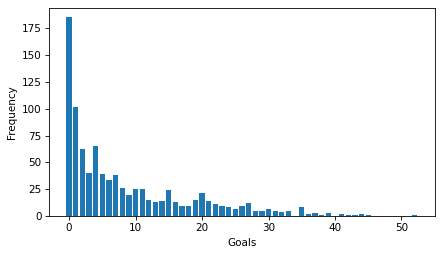

In [50]:
situation = "all"
feature = "I_F_goals"

all_situations_df = df[df["situation"]==situation]
ftab_goals = FreqTab.from_seq(all_situations_df["I_F_goals"], name=feature)
ftab_goals.bar()
print("Mode: " + str(ftab_goals.mode()))
thinkstats.decorate(xlabel="Goals", ylabel="Frequency", legend=False)


In [18]:
namePlayer="Leon Draisaitl"
situations = df['situation'].unique()

In [27]:
import importlib
from utils import plot_utils  # importa il modulo la prima volta

importlib.reload(plot_utils)

<module 'utils.plot_utils' from '/Users/daniel_daduyo/Desktop/projects/moneypuck-data/utils/plot_utils.py'>

### cdf

In [12]:
selected_stat = "I_F_xGoals"
i_f_xgoals_dir = os.path.join(outputs_dir, selected_stat)
os.makedirs(i_f_xgoals_dir, exist_ok=True)

In [ ]:
cdf_dir = os.path.join(i_f_xgoals_dir, "cdf")
os.makedirs(cdf_dir, exist_ok=True)

results = []

for sit in situations:
    df_sit = df[df['situation'] == sit].copy()
    xGoals = df_sit[selected_stat].values

    player_xGoals = df_sit[df_sit["name"]==namePlayer][selected_stat].values
    threshold = player_xGoals[0]

    # percentile rank
    percentage = thinkstats.percentile_rank(threshold, xGoals)
    results.append({"situation": sit, "xGoals <= player (%)": percentage})

    # cdf
    plot_utils.save_cdf(
        values=xGoals, 
        reference_value=threshold, 
        output_dir=os.path.join(cdf_dir, f'cdf_{sit}'),
        title=f'I_F_xGoals - {sit}',
        reference_label=f'{namePlayer}'
        )

df_result = pd.DataFrame(results)
df_result


,situation,xGoals <= player (%)
0,other,99.673913
1,all,98.043478
2,5on5,89.130435
3,4on5,57.608696
4,5on4,97.065217


### Goals per 60

In [ ]:
goals_per_60_dir = os.path.join(outputs_dir, 'goals_per_60')
goals_vs_xg_dir=os.path.join(outputs_dir, 'goals_vs_xg')

In [ ]:
for sit in situations:
    df_sit = df[df['situation']==sit].copy()
    df_sit['goals_per_60'] = (df_sit['I_F_goals'] / df_sit['icetime']) * 60
    df_sit['xG_per_60'] = (df_sit['I_F_xGoals'] / df_sit['icetime']) * 60

    plot_utils.save_histogram(
        df=df_sit,
        column='goals_per_60',
        output_dir=os.path.join(goals_per_60_dir, 'histograms'),
        filename_prefix=f'histogram_{sit}',
        title=f'Goals per 60 - {sit}',
        xlabel='Goals per 60 minutes',
        ylabel='Number of players',
        color='blue'
    )

    plot_utils.save_boxplot(
        df=df_sit,
        x_column='position',
        y_column='goals_per_60',
        output_dir=os.path.join(goals_per_60_dir, 'boxplots'),
        filename_prefix=f'boxplot_{sit}',
        title=f'Goals per 60 by Position - {sit}',
        xlabel='Position',
        ylabel='Goals per 60 minutes'
    )

    plot_utils.save_scatterplot(
        df=df_sit,
        x_column='xG_per_60',
        y_column='goals_per_60',
        hue_column='position',
        output_dir=os.path.join(goals_vs_xg_dir, 'scatterplots'),
        filename_prefix=f'scatter_{sit}',
        title=f'Goals per 60 vs Expected Goals per 60 - {sit}',
        xlabel='Expected Goals per 60',
        ylabel='Goals per 60',
    )
